In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
import random
import pickle
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from scipy.stats import loglaplace, lognorm, laplace, norm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.special import erf
warnings.filterwarnings('ignore')
sns.set(style="white", context="talk")
from matplotlib import rc

rc('text', usetex=True)
np.random.seed(42)

In [18]:
def signal_lognormal(n, m=1e-3, a = 1.0):
    # sample bias for each agent from a lognormal distribution
    # μ_normal is the mean of the underlying normal distribution. 
    # This function returns lognormal distributions that have a median m 
    # and variance a
    
    s = np.random.lognormal(mean= np.log(θ) + m ,sigma = a,size=n)
    return s

def ωandn(ω,n):
    w = (1-ω)*np.ones(n)/n
    w[0]+=ω
    return w

def w_cycle(n):
    w = np.ones(n)/n
    return w

In [21]:
θ = 2    # true state of the world
μ = np.linspace(-3,3,31)
σ = np.logspace(-1,1,21)

n_samples = 1000

In [22]:
ω_range = np.linspace(0,1,5)
n_range = np.asarray([5,10,25,50])

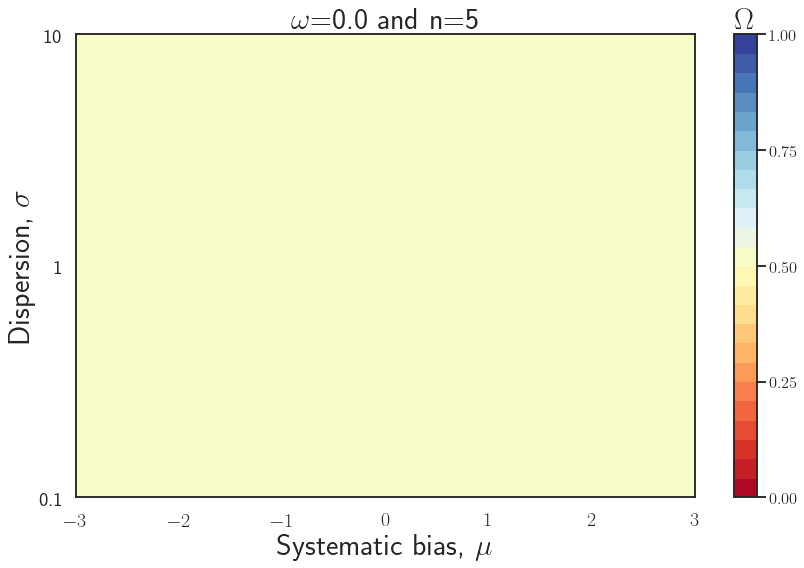

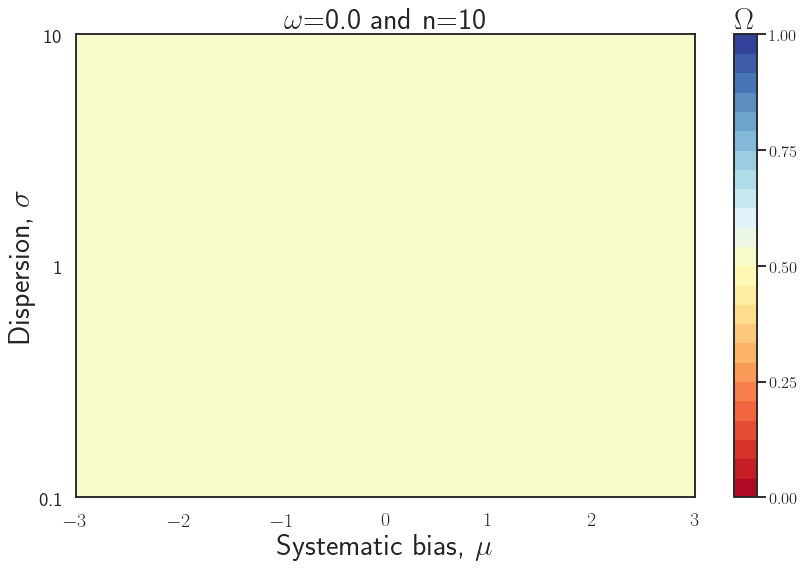

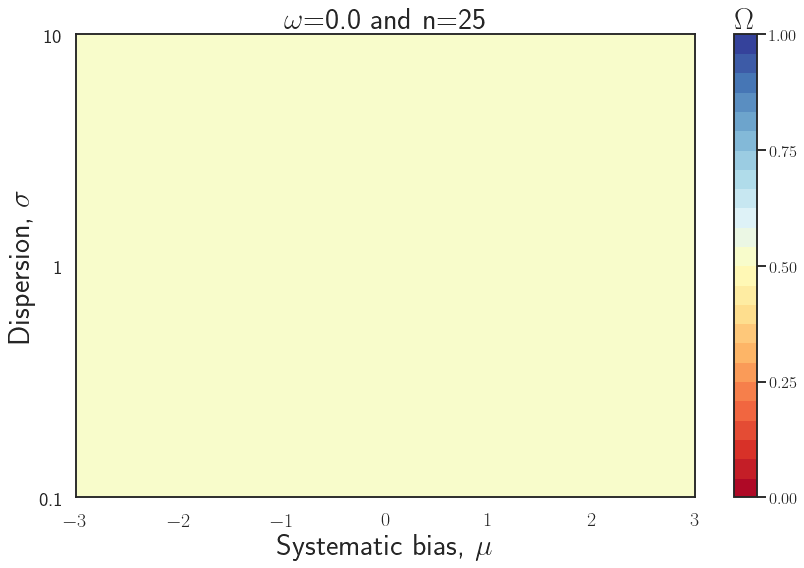

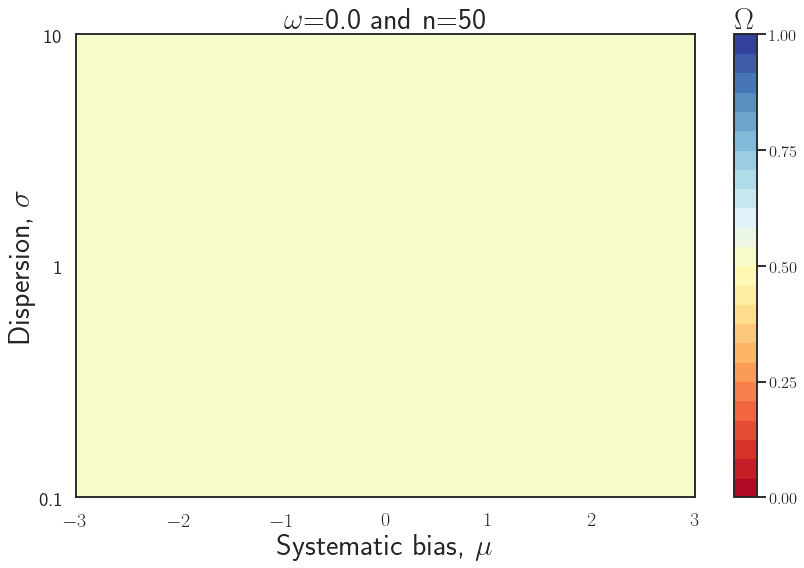

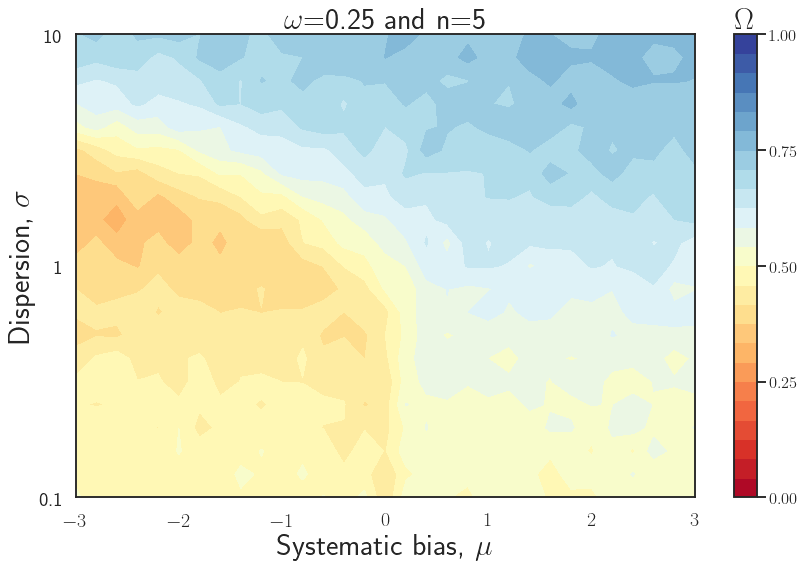

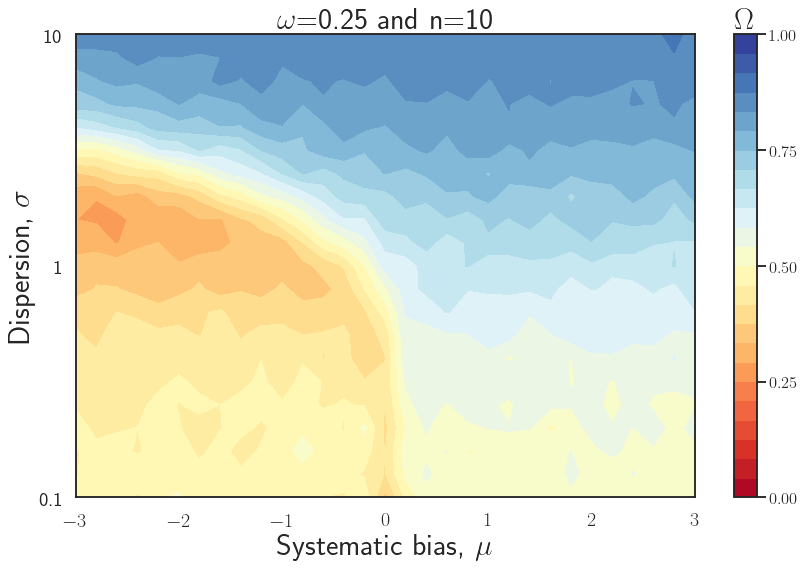

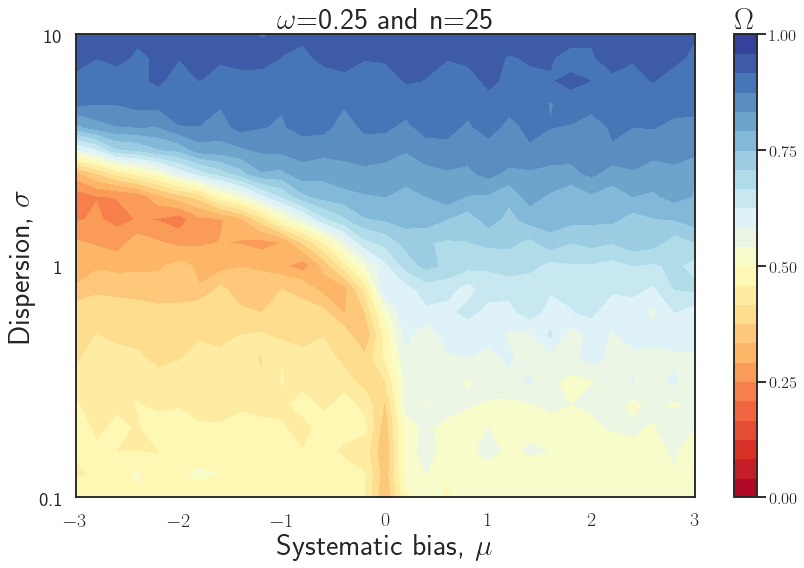

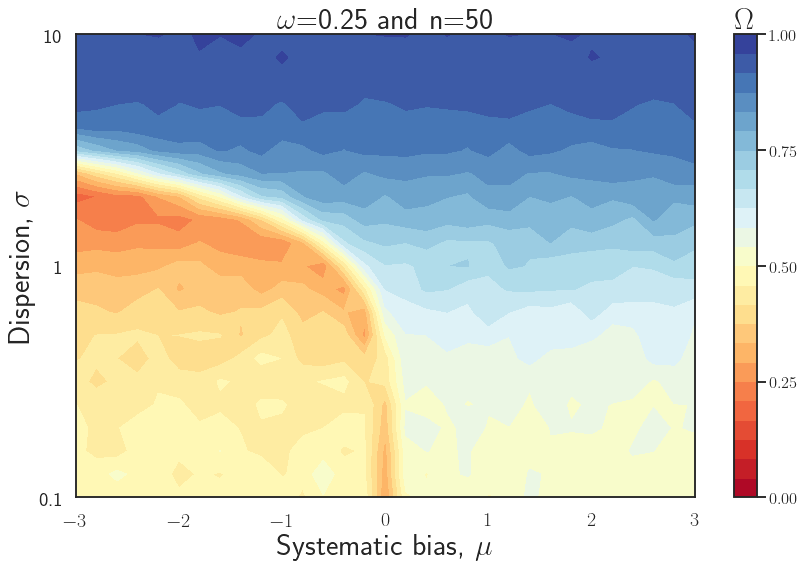

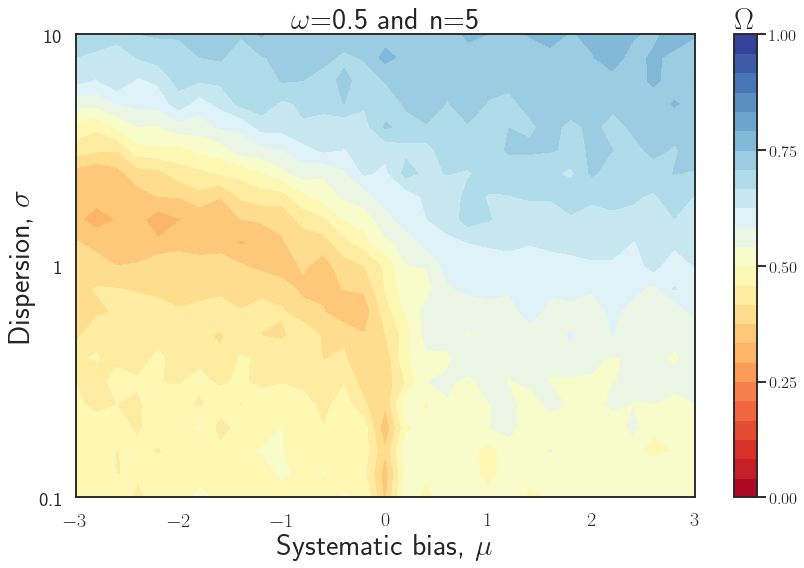

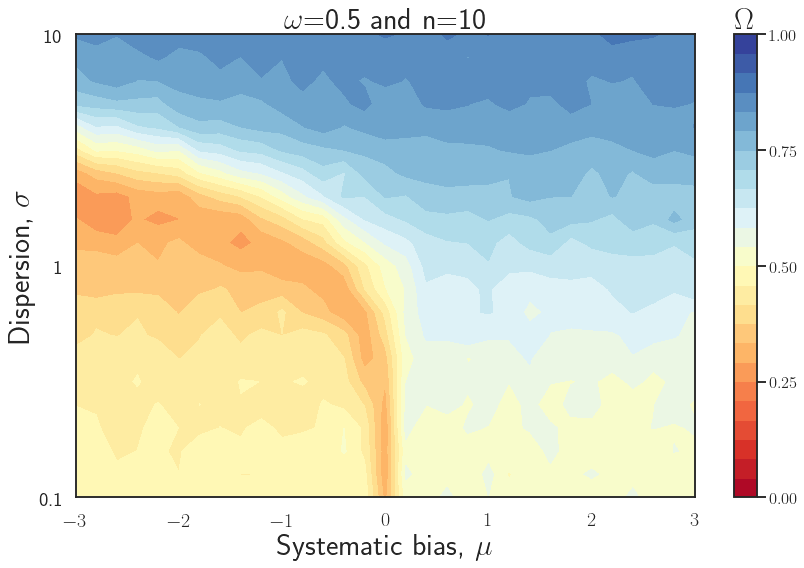

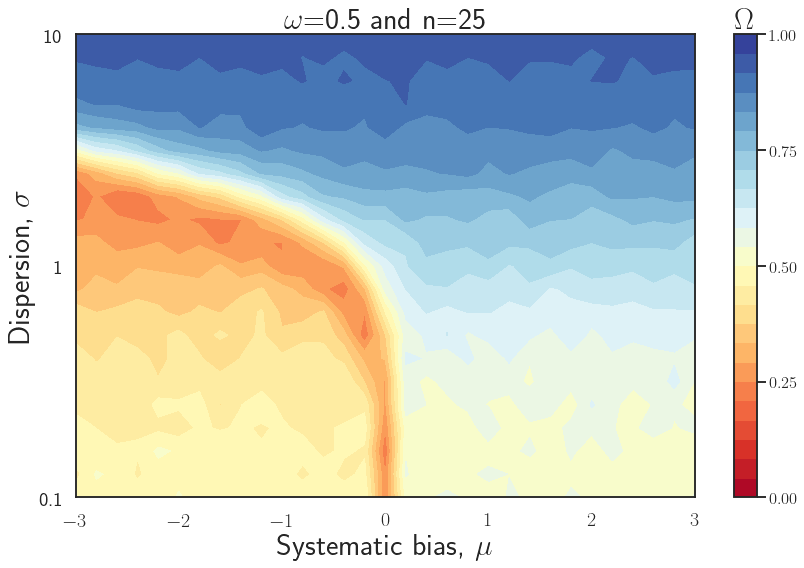

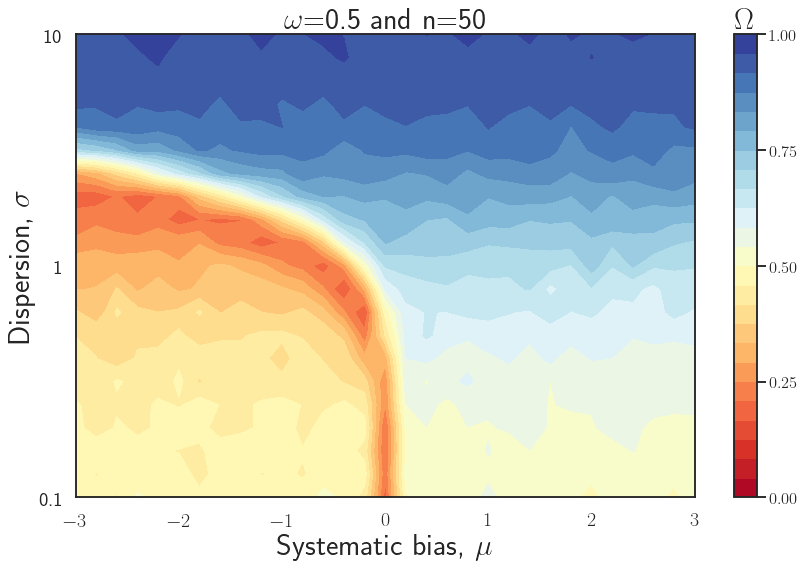

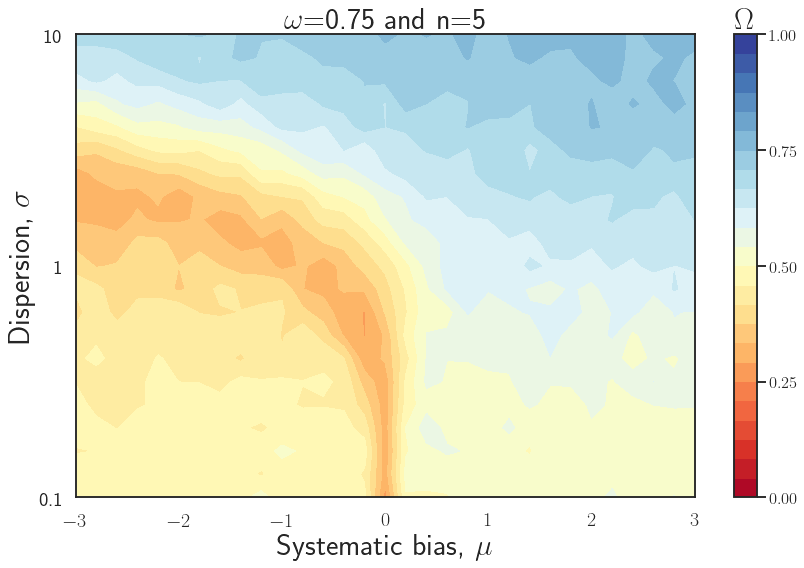

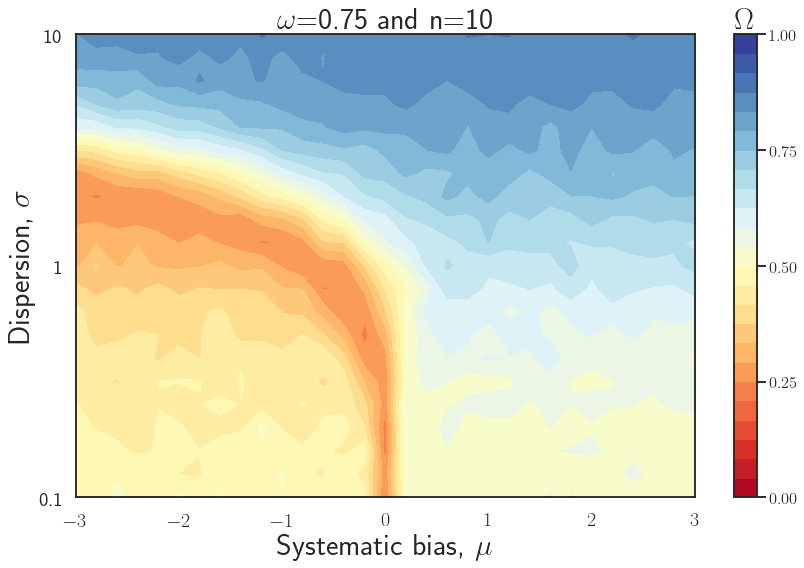

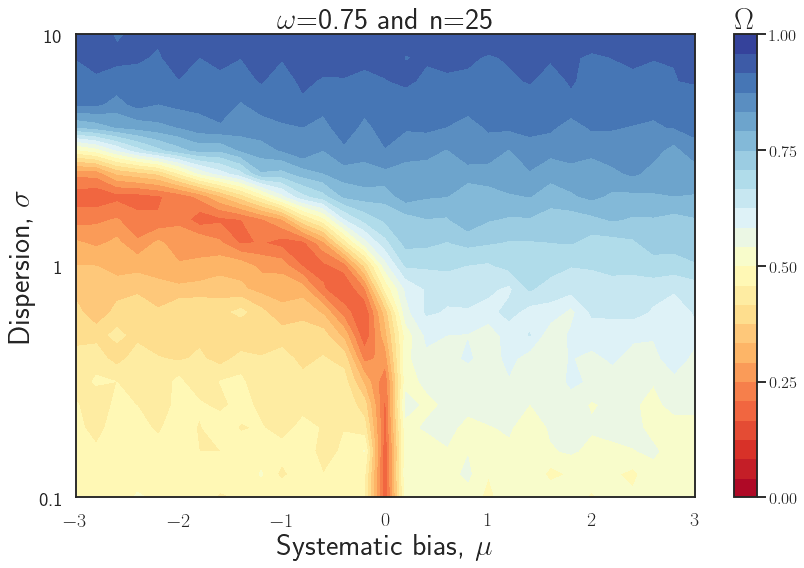

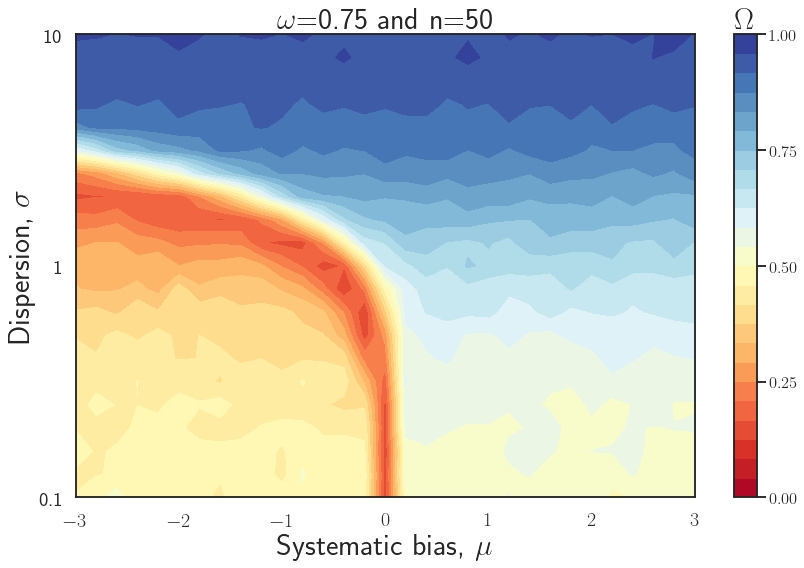

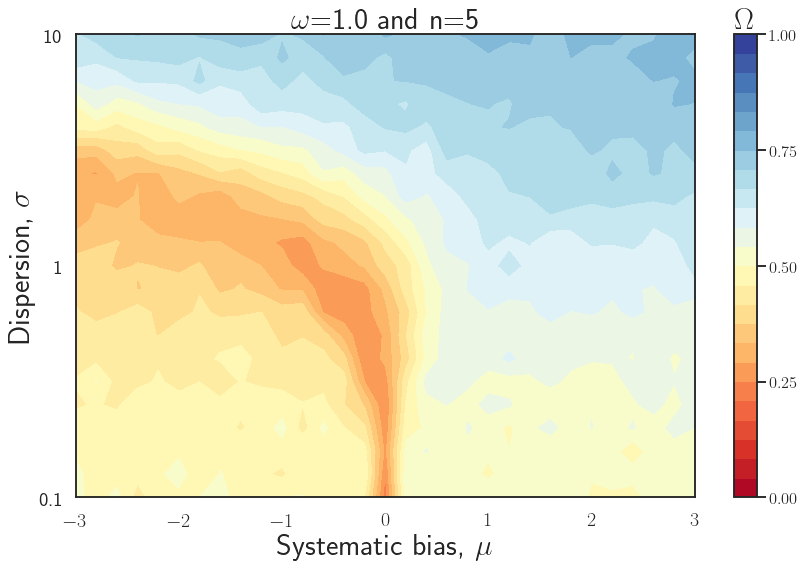

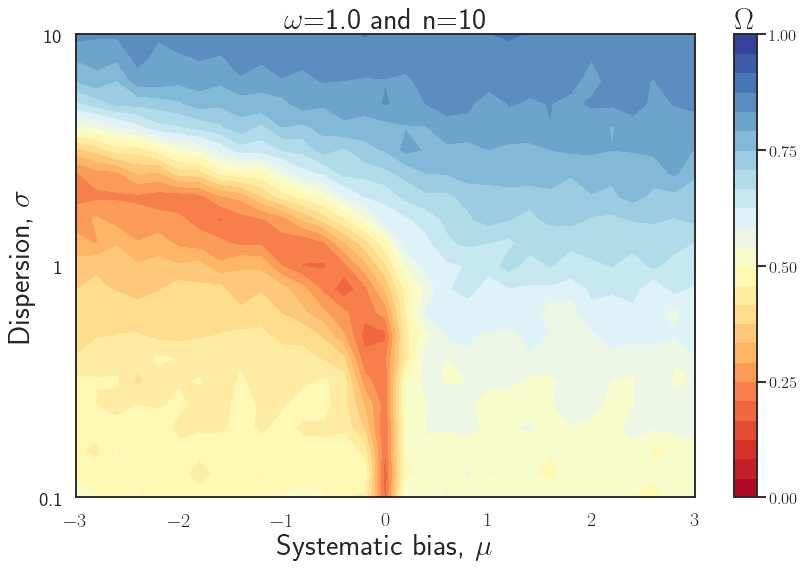

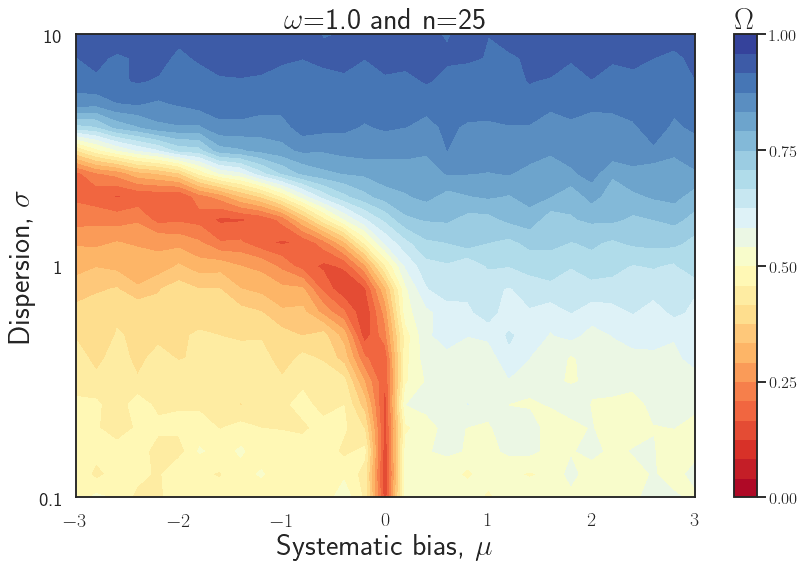

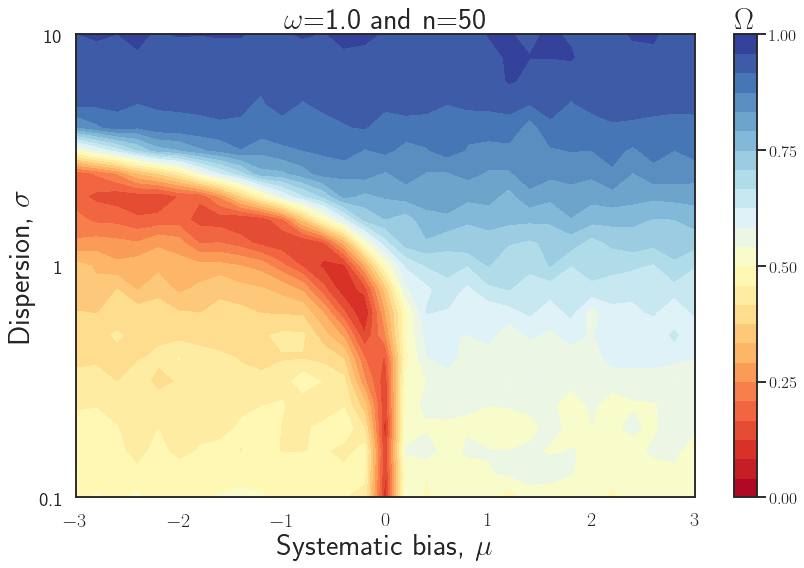

In [23]:
for ω in ω_range:
    for n in n_range:
        Ω = np.zeros([len(μ),len(σ)])
        w_vector = ωandn(ω,n)
        w_cycle_ = w_cycle(n)
        
        for idx_n,μn in enumerate(μ):
            for idx_α,_α in enumerate(σ):
                for i in range(n_samples):
                    s = signal_lognormal(n,m=μn,a=_α)
        
                    star_MSE =  ((w_vector@s) - θ)**2
                    cycle_MSE = ((w_cycle_@s) - θ)**2
                    
                    if star_MSE == cycle_MSE:
                        Ω[idx_n,idx_α] += 0.5/n_samples
                    elif star_MSE < cycle_MSE:
                        Ω[idx_n,idx_α] += 1/n_samples
        
        # This is an illustrative coarsed figure. The high resolution one is in "Fig2.Linking task features and network structure.ipynb"
        μμ, σσ = np.meshgrid(μ, σ)
        sigma = 0 # this is a lower sigma than what we used in the main text figure (i.e., main text used further smoothing and more fine-grained steps)
        data = gaussian_filter(Ω.T, sigma)
        
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111)
        ax.set_yscale('log',basey=10)
        
        ax.set_yticks((0.1,1,10))
        ax.set_yticklabels((0.1,1,10))
        
        main_cs = ax.contourf(μμ,σσ,data,levels=np.linspace(0,1,25),cmap='RdYlBu')
        clb = fig.colorbar(main_cs, ticks=np.linspace(0,1,5))
        clb.ax.set_title(r"$\Omega$",fontsize=30)
        
        ax.set_xlabel("Systematic bias, $\mu$",fontsize=30)
        ax.set_ylabel('Dispersion, $\sigma$',fontsize=30)
        
        ax.set_ylim(0.1,10)
        
        ax.tick_params(labelsize=20)
        
        plt.tight_layout()
        plot_title = r'$\omega$={} and n={}'.format(ω,n)
        ax.set_title(plot_title,fontsize=30)
        #plt.savefig('omega{}_n{}.pdf'.format(ω,n), bbox_inches='tight')